# Artificial Neural Network 

In [1]:
#importing dependencies
import pandas as pd
import numpy as np


In [ ]:
# loading dataset
df = pd.read_csv('/content/breast-cancer.csv')
df.head()

In [3]:
#spliting data 
x = df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

In [4]:
#encoding label
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(y)

In [34]:
#spliting data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [35]:
#scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [36]:
x_train.shape

(455, 31)

In [37]:
#import model platform 
import keras
from keras.models import sequential
from keras.layers import Dense, Dropout

In [38]:
from keras.engine.sequential import Sequential
#training model
classifier = Sequential()

#adding first hidden layer and input
classifier.add(Dense(16,activation='relu',input_dim=31))

classifier.add(Dropout(0.3))
#adding second hidden layer
classifier.add(Dense(16,activation='relu'))

classifier.add(Dropout(0.3))
#adding the output layer
classifier.add(Dense(1,activation='linear'))

In [39]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
classifier.fit(x=x_train,y=y_train,batch_size=120,epochs=40,validation_split=0.2)

Epoch 1/40
4/4 [==============================] - 1s 58ms/step - loss: 4.5045 - accuracy: 0.6291 - val_loss: 5.0324 - val_accuracy: 0.6484
Epoch 2/40
4/4 [==============================] - 0s 9ms/step - loss: 4.5071 - accuracy: 0.6401 - val_loss: 4.8788 - val_accuracy: 0.6484
Epoch 3/40
4/4 [==============================] - 0s 11ms/step - loss: 4.3053 - accuracy: 0.6484 - val_loss: 4.7069 - val_accuracy: 0.6703
Epoch 4/40
4/4 [==============================] - 0s 10ms/step - loss: 4.3576 - accuracy: 0.6538 - val_loss: 4.4284 - val_accuracy: 0.6703
Epoch 5/40
4/4 [==============================] - 0s 9ms/step - loss: 3.6839 - accuracy: 0.6923 - val_loss: 4.2411 - val_accuracy: 0.6703
Epoch 6/40
4/4 [==============================] - 0s 9ms/step - loss: 3.8121 - accuracy: 0.6951 - val_loss: 4.0626 - val_accuracy: 0.6703
Epoch 7/40
4/4 [==============================] - 0s 9ms/step - loss: 2.8914 - accuracy: 0.7033 - val_loss: 3.7426 - val_accuracy: 0.6923
Epoch 8/40
4/4 [===============

In [41]:
y_pred = classifier.predict(x_test)
y_pred =(y_pred > 0.5)

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[71,  3],
       [ 3, 37]])

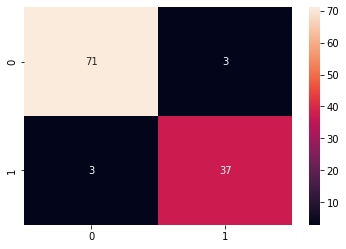

In [43]:
import seaborn as sns
sns.heatmap(cm,annot=True)
